In [83]:
# Importing the required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [54]:
# Load the dataset into a pandas dataframe
data = pd.read_excel('E:\P288_Clustering_Project\P288_Group1_Clustering_Project_Excelr\Dataset\World_development_mesurement.xlsx')

# Creating a DataFrame with the loaded data
df = pd.DataFrame(data)

In [55]:
# Checking the data frame is loaded properly without any errors
df

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage  \
0                        NaN               NaN       26998.0   
1                        NaN               NaN        7499.0   
2                        NaN               NaN        1983.0   
3                        NaN               NaN        1836.0   
4                        NaN               NaN           NaN   
...                      ...               ...           ...   
2699                     NaN               NaN           NaN   
2700                     5.0               4.0     2132446.0   
2701                     7.0              85.0           NaN   
2702                   144.0             180.0           NaN   
2703                     NaN               NaN           NaN   

                      GDP  Health Exp % GDP Health Exp/Capita  ...  \
0         $54,790,058,957             0.035               $60  ...   
1          $9,129,594,819             0.034               $22  ...   
2          $2,359,122,303             0.043               $15  ...   
3          $5,788,311,645             0.047              $152  ...   
4          $2,610,959,139             0.051               $12  ...   
...                   ...               ...               ...  ...   
2699                  NaN               NaN               NaN  ...   
2700  $16,244,600,000,000             0.179            $8,895  ...   
2701      $50,004,354,667             0.089            $1,308  ...   
2702     $381,286,223,859             0.046              $593  ...   
2703                  NaN               NaN               NaN  ...   

      Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             32427   
27

In [56]:
# checking if there are any multiple columns/ repeated columns
print(df.columns.value_counts())
print(df.columns.is_unique)

Birth Rate                1
Lending Interest          1
Tourism Inbound           1
Population Urban          1
Population Total          1
Population 65+            1
Population 15-64          1
Population 0-14           1
Number of Records         1
Mobile Phone Usage        1
Life Expectancy Male      1
Life Expectancy Female    1
Internet Usage            1
Business Tax Rate         1
Infant Mortality Rate     1
Hours to do Tax           1
Health Exp/Capita         1
Health Exp % GDP          1
GDP                       1
Energy Usage              1
Ease of Business          1
Days to Start Business    1
Country                   1
CO2 Emissions             1
Tourism Outbound          1
Name: count, dtype: int64
True


In [57]:
# checking if there are any duplicated values present in the dataset using duplicated function
print(df.duplicated().sum())

0


In [58]:
# Basic information about the dataset
print("Basic information about the dataset:")
print(df.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Lif

In [59]:
# Descriptive Statistics
df.describe()

Birth Rate  CO2 Emissions  Days to Start Business  Ease of Business  \
count  2585.000000   2.125000e+03             1718.000000        185.000000   
mean      0.022715   1.423071e+05               39.999418         94.875676   
std       0.011338   6.159288e+05               57.318588         54.791906   
min       0.007000   7.000000e+00                1.000000          1.000000   
25%       0.013000   1.360000e+03               13.000000         48.000000   
50%       0.020000   8.529000e+03               26.000000         94.000000   
75%       0.031000   5.910800e+04               45.000000        142.000000   
max       0.053000   8.286892e+06              694.000000        189.000000   

       Energy Usage  Health Exp % GDP  Hours to do Tax  Infant Mortality Rate  \
count  1.785000e+03       2395.000000      1416.000000            2444.000000   
mean   7.723684e+04          0.064170       302.068503               0.032813   
std    2.599239e+05          0.026325       273.299686               0.029968   
min    8.000000e+00          0.008000        12.000000               0.002000   
25%    3.737000e+03          0.046000       156.000000               0.009000   
50%    1.433800e+04          0.061000       239.000000               0.020000   
75%    4.185200e+04          0.079000       344.750000               0.053000   
max    2.727728e+06          0.225000      2600.000000               0.141000   

       Internet Usage  Lending Interest  Life Expectancy Female  \
count     2531.000000       1880.000000             2568.000000   
mean         0.239747          0.148103               71.159268   
std          0.260132          0.171829               10.708262   
min          0.000000          0.005000               39.000000   
25%          0.000000          0.080000               64.000000   
50%          0.100000          0.120000               75.000000   
75%          0.400000          0.173000               79.000000   
max          1.000000          4.965000               87.000000   

       Life Expectancy Male  Mobile Phone Usage  Number of Records  \
count           2568.000000         2537.000000             2704.0   
mean              66.461838            0.578124                1.0   
std                9.390217            0.474647                0.0   
min               37.000000            0.000000                1.0   
25%               61.000000            0.100000                1.0   
50%               69.000000            0.500000                1.0   
75%               73.250000            0.900000                1.0   
max               88.000000            2.900000                1.0   

       Population 0-14  Population 15-64  Population 65+  Population Total  \
count      2484.000000       2484.000000     2484.000000      2.704000e+03   
mean          0.303051          0.623481        0.073465      3.145729e+07   
std           0.106577          0.069660        0.049541      1.242894e+08   
min           0.118000          0.474000        0.003000      1.887600e+04   
25%           0.204750          0.559000        0.033000      8.783360e+05   
50%           0.299500          0.642500        0.052000      5.800324e+06   
75%           0.402000          0.676000        0.112000      2.014089e+07   
max           0.500000          0.858000        0.244000      1.350695e+09   

       Population Urban  
count       2678.000000  
mean           0.562953  
std            0.245897  
min            0.082000  
25%            0.356000  
50%            0.560000  
75%            0.765000  
max            1.000000

In [60]:
# Checking for the null values present in the data
df.isna().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [61]:
def fill_with_median(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column].fillna(df[column].median(), inplace=True)
    return df

# Assuming df is your DataFrame
df = fill_with_median(df)

In [62]:
# Checking for the null values present in the data after applying our fill_with_median function
df.isna().sum()

Birth Rate                   0
Business Tax Rate         1281
CO2 Emissions                0
Country                      0
Days to Start Business       0
Ease of Business             0
Energy Usage                 0
GDP                        210
Health Exp % GDP             0
Health Exp/Capita          309
Hours to do Tax              0
Infant Mortality Rate        0
Internet Usage               0
Lending Interest             0
Life Expectancy Female       0
Life Expectancy Male         0
Mobile Phone Usage           0
Number of Records            0
Population 0-14              0
Population 15-64             0
Population 65+               0
Population Total             0
Population Urban             0
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [63]:
# converting percentage(string) into a float data type so we can recode the null data with median value
def convert_percentage(df, column):
    df[column] = df[column].str.rstrip('%').astype('float') / 100.0
    return df
df = convert_percentage(df, 'Business Tax Rate')

In [64]:
# converting currency(string) into a float data type so we can recode the null data with median value
def convert_currency(df, column):
    df[column] = df[column].replace('[\$,]', '', regex=True).astype(float)
    return df

# Assuming df is your DataFrame and 'column_name' is the name of your column
df = convert_currency(df,['GDP','Health Exp/Capita','Tourism Inbound','Tourism Outbound'])

In [65]:
df.dtypes

Birth Rate                float64
Business Tax Rate         float64
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object

In [66]:
def fill_with_median(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column].fillna(df[column].median(), inplace=True)
    return df

# Assuming df is your DataFrame
df = fill_with_median(df)

In [67]:
# Checking for the null values present in the data after applying our fill_with_median function
df.isna().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

""" we can see that there are no more null values in our data , hence we can move forward with the EDA process to our cleaned data """

# EDA - Exploratory Data Analysis

In [68]:
# loading the cleaned dataframe into a csv file for smooth forwarding in the further processes of the project
df.to_csv('E:\P288_Clustering_Project\P288_Group1_Clustering_Project_Excelr\Dataset\Cleaned_Dataset.csv', index=False)

In [69]:
# Load the dataset into a pandas dataframe
data = pd.read_csv('E:\P288_Clustering_Project\P288_Group1_Clustering_Project_Excelr\Dataset\Cleaned_Dataset.csv')

# Creating a DataFrame with the loaded data
df = pd.DataFrame(data)

# checking the dataframe
df

Birth Rate  Business Tax Rate  CO2 Emissions                   Country  \
0          0.020              0.410        87931.0                   Algeria   
1          0.050              0.410         9542.0                    Angola   
2          0.043              0.410         1617.0                     Benin   
3          0.027              0.410         4276.0                  Botswana   
4          0.046              0.410         1041.0              Burkina Faso   
...          ...                ...            ...                       ...   
2699       0.020              0.410         8529.0  Turks and Caicos Islands   
2700       0.013              0.464         8529.0             United States   
2701       0.015              0.419         8529.0                   Uruguay   
2702       0.020              0.619         8529.0             Venezuela, RB   
2703       0.011              0.410         8529.0     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage           GDP  \
0                       26.0              94.0       26998.0  5.479006e+10   
1                       26.0              94.0        7499.0  9.129595e+09   
2                       26.0              94.0        1983.0  2.359122e+09   
3                       26.0              94.0        1836.0  5.788312e+09   
4                       26.0              94.0       14338.0  2.610959e+09   
...                      ...               ...           ...           ...   
2699                    26.0              94.0       14338.0  1.507975e+10   
2700                     5.0               4.0     2132446.0  1.624460e+13   
2701                     7.0              85.0       14338.0  5.000435e+10   
2702                   144.0             180.0       14338.0  3.812862e+11   
2703                    26.0              94.0       14338.0  1.507975e+10   

      Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Male  \
0                0.035               60.0  ...                  67.0   
1                0.034               22.0  ...                  44.0   
2                0.043               15.0  ...                  53.0   
3                0.047              152.0  ...                  49.0   
4                0.051               12.0  ...                  49.0   
...                ...                ...  ...                   ...   
2699             0.061              193.0  ...                  69.0   
2700             0.179             8895.0  ...                  76.0   
2701             0.089             1308.0  ...                  74.0   
2702             0.046              593.0  ...                  72.0   
2703             0.061              193.0  ...                  76.0   

      Mobile Phone Usage  Number of Records  Population 0-14  \
0                    0.0                  1           0.3420   
1                    0.0                  1           0.4760   
2                    0.0                  1           0.4540   
3                    0.1                  1           0.3830   
4                    0.0                  1           0.4680   
...                  ...                ...              ...   
2699                 0.5                  1           0.2995   
2700                 1.0                  1           0.1960   
2701                 1.5                  1           0.2200   
2702                 1.0                  1           0.2880   
2703                 0.5                  1           0.2060   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0               0.6190           0.039          31719449             0.599   
1               0.4990           0.025          13924930             0.324   
2               0.5170           0.029           6949366             0.383   
3               0.5870           0.029           1755375             0.532   
4               0.5050           0.028          11607944             0.178   
...   

In [70]:
# checking if there are any null values present in the dataset

df.isna().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

In [71]:
for column in df.columns:
    fig = go.Figure()

    fig.add_trace(go.Histogram(x=df[column], name=column))

    min_val = df[column].min()
    max_val = df[column].max()

    fig.add_annotation(x=min_val, y=0,
                       text=f"Min: {min_val}",
                       showarrow=True,
                       arrowhead=1)

    fig.add_annotation(x=max_val, y=0,
                       text=f"Max: {max_val}",
                       showarrow=True,
                       arrowhead=1)

    # Set the title of the plot to be the column name
    fig.update_layout(title_text=column)

    fig.show()


In [72]:
for column in df.columns:
    fig = go.Figure()

    fig.add_trace(go.Box(y=df[column], name=column))

    min_val = df[column].min()
    max_val = df[column].max()

    fig.add_annotation(x=0, y=min_val,
                       text=f"Min: {min_val}",
                       showarrow=True,
                       arrowhead=1)

    fig.add_annotation(x=0, y=max_val,
                       text=f"Max: {max_val}",
                       showarrow=True,
                       arrowhead=1)

    fig.show()


""" As we can see that our data contains both outliers and is also not normally distributed as per Boxplot,Histograms respectively, Hence we have to do IQR capping and normalization technique to continue with the project"""

# IQR CAPPING

In [73]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
# Drop the 'Country' and 'GDP' columns
df = df.drop(['Birth Rate', 'Country', 'Ease of Business', 'Internet Usage','Number of Records' ,'Population 0-14' ,'Population Urban'], axis=1)

# Define a function to calculate the upper and lower fences for each column
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    return Lower_Fence, Upper_Fence

# Define a function to recode the outliers in each column
def recode_outliers(x):
    lower_fence, upper_fence = iqr_fence(x)
    x[x < lower_fence] = lower_fence
    x[x > upper_fence] = upper_fence
    return x

# Apply the function to each column to recode the outliers
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number):  # only apply to numeric columns
        df[column] = recode_outliers(df[column])

# Save the resulting DataFrame to a new CSV file
df.to_csv('E:\P288_Clustering_Project\P288_Group1_Clustering_Project_Excelr\Dataset\IQR.csv', index=False)


C:\Users\nazee\AppData\Local\Temp\ipykernel_16956\477041667.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nazee\AppData\Local\Temp\ipykernel_16956\477041667.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nazee\AppData\Local\Temp\ipykernel_16956\477041667.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nazee\AppData\Local\Temp\ipykernel_16956\477041667.py:21: SettingWithCopyWarning:


A value

In [75]:
# Load the dataset into a pandas dataframe
data = pd.read_csv('E:\P288_Clustering_Project\P288_Group1_Clustering_Project_Excelr\Dataset\IQR.csv')

# Creating a DataFrame with the loaded data
df = pd.DataFrame(data)

# checking the dataframe
df

Business Tax Rate  CO2 Emissions  Days to Start Business  Energy Usage  \
0                0.4100        87931.0                  26.000     26998.000   
1                0.4100         9542.0                  26.000      7499.000   
2                0.4100         1617.0                  26.000      1983.000   
3                0.4100         4276.0                  26.000      1836.000   
4                0.4100         1041.0                  26.000     14338.000   
...                 ...            ...                     ...           ...   
2699             0.4100         8529.0                  26.000     14338.000   
2700             0.4515         8529.0                   5.000     46913.625   
2701             0.4190         8529.0                   7.000     14338.000   
2702             0.4515         8529.0                  55.625     14338.000   
2703             0.4100         8529.0                  26.000     14338.000   

               GDP  Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
0     5.479006e+10             0.035             60.000           239.00   
1     9.129595e+09             0.034             22.000           239.00   
2     2.359122e+09             0.043             15.000           239.00   
3     5.788312e+09             0.047            152.000           239.00   
4     2.610959e+09             0.051             12.000           239.00   
...            ...               ...                ...              ...   
2699  1.507975e+10             0.061            193.000           239.00   
2700  2.213750e+11             0.118           1291.125           189.75   
2701  5.000435e+10             0.089           1291.125           295.75   
2702  2.213750e+11             0.046            593.000           295.75   
2703  1.507975e+10             0.061            193.000           239.00   

      Infant Mortality Rate  Lending Interest  Life Expectancy Female  \
0                    0.0340            0.1000                    71.0   
1                    0.1075            0.2265                    47.0   
2                    0.0900            0.1200                    57.0   
3                    0.0540            0.1550                    52.0   
4                    0.0960            0.1200                    52.0   
...                     ...               ...                     ...   
2699                 0.0200            0.1200                    75.0   
2700                 0.0060            0.0330                    81.0   
2701                 0.0100            0.1120                    80.0   
2702                 0.0130            0.1640                    78.0   
2703                 0.0200            0.1200                    83.0   

      Life Expectancy Male  Mobile Phone Usage  Population 15-64  \
0                     67.0                 0.0            0.6190   
1                     44.0                 0.0            0.4990   
2                     53.0                 0.0            0.5170   
3                     49.0                 0.1            0.5870   
4                     49.0                 0.0            0.5050   
...                    ...                 ...               ...   
2699                  69.0                 0.5            0.6425   
2700                  76.0                 1.0            0.6670   
2701                  74.0                 1.5            0.6390   
2702                  72.0                 1.0            0.6520   
2703                  76.0                 0.5            0.6410   

      Population 65+  Population Total  Tourism Inbound  Tourism Outbound  
0              0.039      3.171945e+07     1.020000e+08      1.930000e+08  
1              0.025      1.392493e+07     3.400000e+07      1.460000e+08  
2              0.029      6.949366e+06     7.700000e+07      5.000000e+07  
3              0.029      1.755375e+06     2.270000e+08      2.090000e+08  
4              0.028      1.160794e+07     2.300000e+07   

In [76]:
for column in df.columns:
    fig = go.Figure()

    fig.add_trace(go.Box(y=df[column], name=column))

    min_val = df[column].min()
    max_val = df[column].max()

    fig.add_annotation(x=0, y=min_val,
                       text=f"Min: {min_val}",
                       showarrow=True,
                       arrowhead=1)

    fig.add_annotation(x=0, y=max_val,
                       text=f"Max: {max_val}",
                       showarrow=True,
                       arrowhead=1)

    fig.show()

# Normalization

In [81]:
# Assuming 'df' is your DataFrame
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [82]:
for column in df.columns:
    fig = go.Figure()

    fig.add_trace(go.Histogram(x=df[column], name=column))

    min_val = df[column].min()
    max_val = df[column].max()

    fig.add_annotation(x=min_val, y=0,
                       text=f"Min: {min_val}",
                       showarrow=True,
                       arrowhead=1)

    fig.add_annotation(x=max_val, y=0,
                       text=f"Max: {max_val}",
                       showarrow=True,
                       arrowhead=1)

    # Set the title of the plot to be the column name
    fig.update_layout(title_text=column)

    fig.show()

# Clustering

In [86]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_normalized)

c:\Users\nazee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [87]:
import plotly.graph_objects as go

# Assuming 'kmeans' is your KMeans object and 'df_normalized' is your DataFrame
labels = kmeans.labels_

fig = go.Figure(data=go.Scatter3d(
    x=df_normalized.iloc[:, 0],  # x-axis - column 0
    y=df_normalized.iloc[:, 1],  # y-axis - column 1
    z=df_normalized.iloc[:, 2],  # z-axis - column 2
    mode='markers',
    marker=dict(
        size=5,
        color=labels,  # set color to the cluster labels
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8
    )
))

fig.show()


In [90]:
sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_normalized)
    sse.append(km.inertia_)

fig = go.Figure(data=go.Scatter(x=list_k, y=sse, mode='lines+markers'))
fig.update_layout(title='Elbow Method', xaxis_title='Number of clusters k', yaxis_title='Sum of squared distance')
fig.show()


c:\Users\nazee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nazee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nazee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nazee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

In [91]:
sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_normalized)
    sse.append(km.inertia_)

fig = go.Figure(data=go.Scatter(x=list_k, y=sse, mode='lines+markers'))
fig.update_layout(title='Elbow Method', xaxis_title='Number of clusters k', yaxis_title='Sum of squared distance')
fig.show()


c:\Users\nazee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nazee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nazee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nazee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

In [92]:
sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_normalized)
    sse.append(km.inertia_)

fig = go.Figure(data=go.Scatter(x=list_k, y=sse, mode='lines+markers'))
fig.update_layout(title='Elbow Method', xaxis_title='Number of clusters k', yaxis_title='Sum of squared distance')
fig.show()


c:\Users\nazee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nazee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nazee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\nazee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

In [93]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(df_normalized)

c:\Users\nazee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=15)

In [94]:
import plotly.graph_objects as go

# Assuming 'kmeans' is your KMeans object and 'df_normalized' is your DataFrame
labels = kmeans.labels_

fig = go.Figure(data=go.Scatter3d(
    x=df_normalized.iloc[:, 0],  # x-axis - column 0
    y=df_normalized.iloc[:, 1],  # y-axis - column 1
    z=df_normalized.iloc[:, 2],  # z-axis - column 2
    mode='markers',
    marker=dict(
        size=5,
        color=labels,  # set color to the cluster labels
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8
    )
))

fig.show()

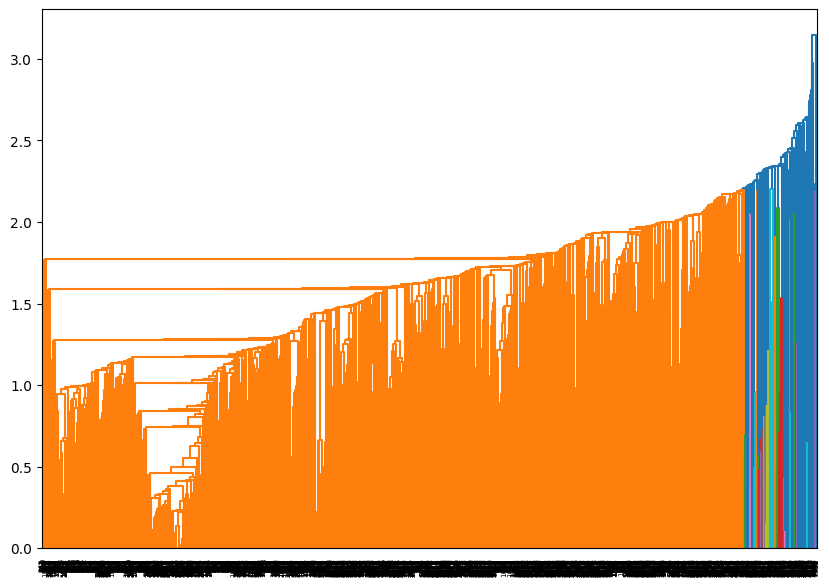

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming 'df_normalized' is your DataFrame
linked = linkage(df_normalized, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()


In [97]:
from scipy.cluster.hierarchy import linkage
from plotly.figure_factory import create_dendrogram

# Assuming 'df_normalized' is your DataFrame
linked = linkage(df_normalized, 'single')

fig = create_dendrogram(df_normalized, linkagefun=lambda x: linked)
fig.update_layout(width=800, height=500)
fig.show()
